In [1]:
library(Seurat)
library(Signac)
library(tidyverse)
library(ggpubr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::reduce() masks Signac::reduce()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
charmbrain = readRDS("/zliu_ssd/CHARM/CHARM_brain/1_createobj_embedding/charm.rds")

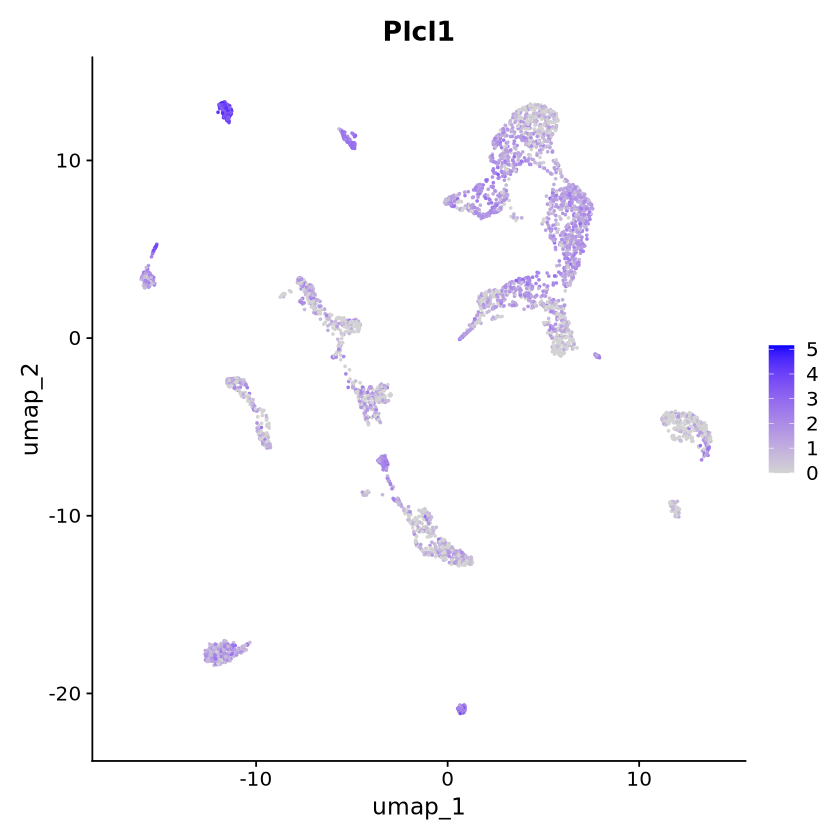

In [3]:
FeaturePlot(charmbrain, "Plcl1")

In [3]:
cellnames_keep_brain = charmbrain[[]] %>% filter(`5k` < 2) %>% filter(!celltype %in% c("Inh_Unknown1","Inh_Unknown2","Ex_Unknown1","Ex_Unknown2")) %>% pull(cellname)
structure_pass_brain = subset(charmbrain,subset=cellname %in% cellnames_keep_brain)

metadata = structure_pass_brain[[]] %>% select(cellname,celltype)
structure_pass_brain[["RNA"]]$counts %>% as.matrix() %>% as.data.frame() %>% rownames_to_column("gene") -> rnamat

In [4]:

# desired_order <- c("Inh_Ndnf/Lamp5", "Inh_MSN", "Inh_Sst", "Inh_Pvalb", "Inh_Vip", 
#                    "Microglia", "Ex_L5/6_NP", "Ex_CL", "Ast", "Ex_OB", "OPC", 
#                    "ODC", "Ex_L5/6_IT", "Ex_L6_CT", "Ex_L3/4_IT", "Ex_L2/3_IT")

desired_order <- c("Ex_CL","Ex_L5/6_IT","Ex_L2/3_IT","Ex_L3/4_IT","Ex_L5/6_NP","Ex_L6_CT","Inh_Vip",
                   "Inh_MSN","OPC","Ast","Microglia","ODC","Inh_Pvalb","Inh_Sst","Inh_Ndnf/Lamp5","Ex_OB")
Idents(structure_pass_brain) <- structure_pass_brain$celltype
Idents(structure_pass_brain) <- factor(x = Idents(structure_pass_brain), levels = rev(desired_order))

In [6]:
library(RColorBrewer)
get_optimized_colors <- function(palette, n) {
  colorRampPalette(brewer.pal(9, palette))(max(n, 9))[seq_len(n)] # 确保最小取色数
}
excitatory_colors <- get_optimized_colors("Reds", 12)[3:12]  
inhibitory_colors <- get_optimized_colors("Blues", 11)[3:12] 
glia_colors <- get_optimized_colors("Greens", 7)[3:6]     


celltype_colors <- c(
  "Ex_Unknown1" = excitatory_colors[1], 
  "Ex_Unknown2" = excitatory_colors[2],
  "Ex_OB" = excitatory_colors[3],
  "Ex_L2/3_IT" = excitatory_colors[4],
  "Ex_L3/4_IT" = excitatory_colors[5],
  "Ex_L5/6_IT" = excitatory_colors[6],
  "Ex_L5/6_NP" = excitatory_colors[7],
  "Ex_L6_CT" = excitatory_colors[8],   
  "Ex_CL" = excitatory_colors[9],
  
  # 抑制性神经元（7类）
  "Inh_Unknown1" = inhibitory_colors[1],
  "Inh_Unknown2" = inhibitory_colors[2],
  "Inh_Pvalb" = inhibitory_colors[3],
  "Inh_Sst" = inhibitory_colors[4],  
  "Inh_MSN" = inhibitory_colors[5], 
  "Inh_Vip" = inhibitory_colors[6],
  "Inh_Ndnf/Lamp5" = inhibitory_colors[7],
  
  # 胶质细胞（4类）
  "Ast" = glia_colors[1],
  "OPC" = glia_colors[2],
  "ODC" = glia_colors[3],
  "Microglia" = glia_colors[4]
)


options(repr.plot.width=10, repr.plot.height=4,repr.plot.res=200)
p <- VlnPlot(structure_pass_brain,features = "Satb2",cols=celltype_colors
) + NoLegend()

p %>% ggsave(filename = "Satb2vln.svg", width = 7, height = 4)

# boxplot ,order by c("Inh_Ndnf/Lamp5","Inh_MSN","Inh_Sst","Inh_Pvalb","Inh_Vip","Microglia","Ex_L5/6_NP","Ex_CL","Ast","Ex_OB","OPC","ODC","Ex_L5/6_IT","Ex_L6_CT","Ex_L3/4_IT","Ex_L2/3_IT")



In [13]:
structure_pass_brain$ident

ERROR: [1m[33mError[39m in `x[[i, drop = TRUE]]`:[22m
[33m![39m 'ident' not found in this Seurat object
 Did you mean "orig.ident"?


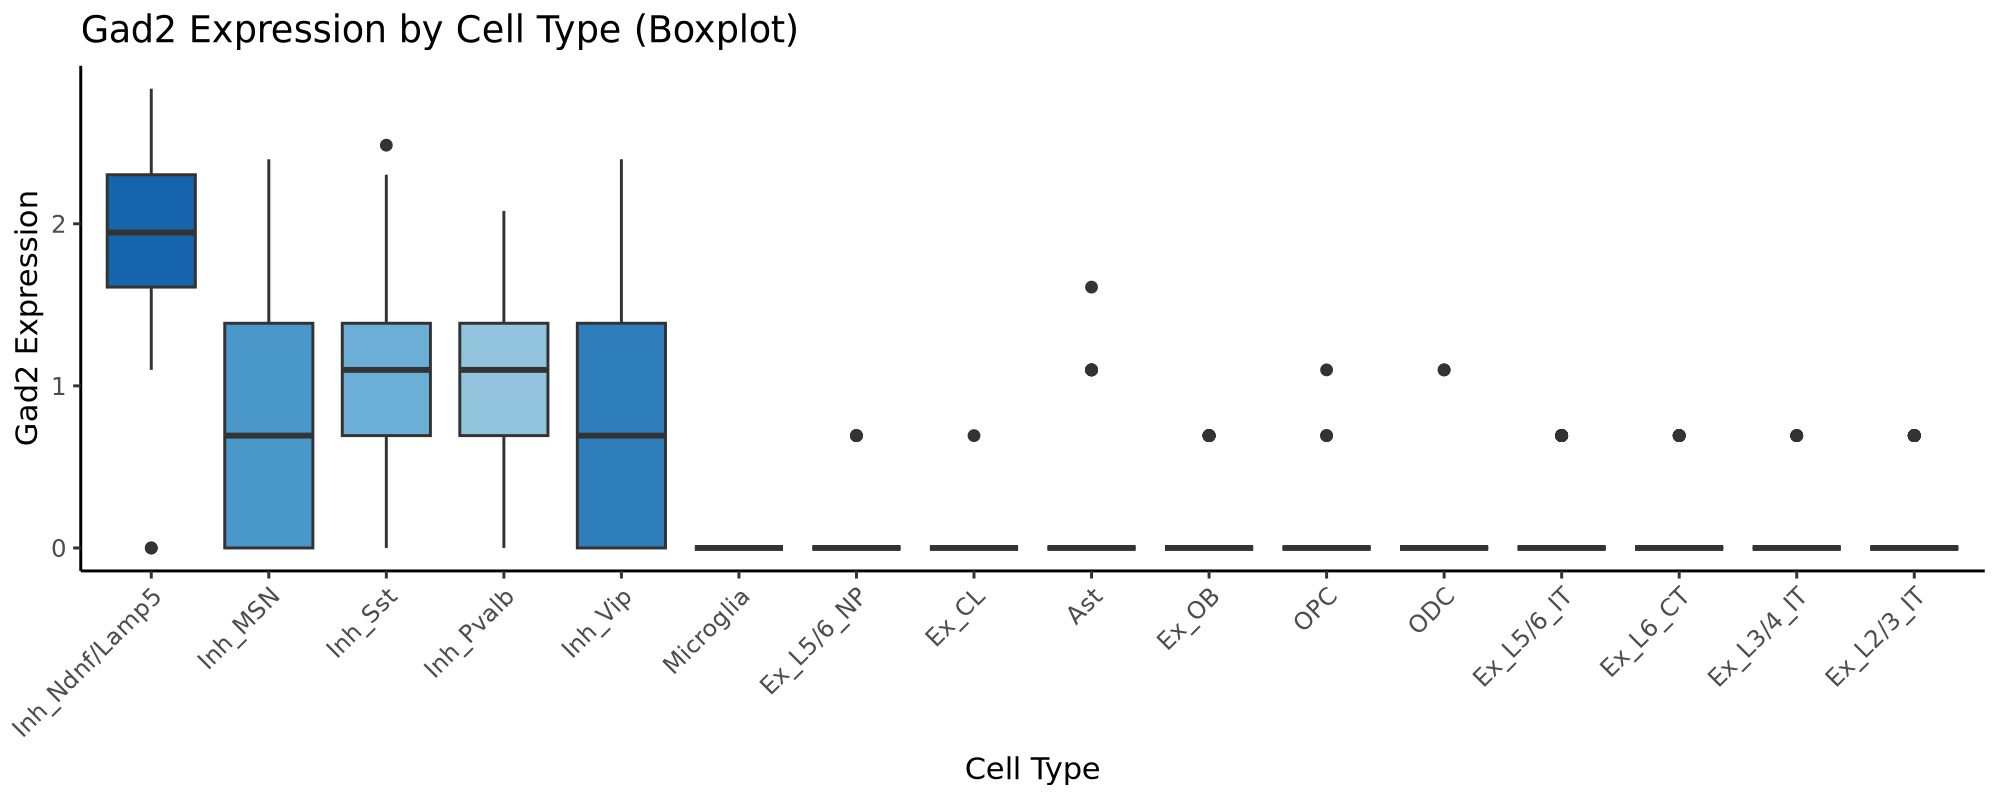

In [25]:
# Assuming 'structure_pass_brain' is your Seurat object
# Assuming 'celltype_colors' is a named vector of colors for your cell types

library(Seurat)
library(ggplot2)

# 1. Extract the data for plotting
# Get the expression data for 'Gad2'
expression_data <- GetAssayData(object = structure_pass_brain, slot = "data", assay = "SCT")["Gad2", ]

# Get the celltype metadata
celltype_metadata <- structure_pass_brain@meta.data$celltype

# Create a data frame for ggplot2
plot_df <- data.frame(
  Expression = expression_data,
  celltype = celltype_metadata
)

# 2. Define the desired order for cell types
desired_order <- c("Inh_Ndnf/Lamp5", "Inh_MSN", "Inh_Sst", "Inh_Pvalb", "Inh_Vip", 
                   "Microglia", "Ex_L5/6_NP", "Ex_CL", "Ast", "Ex_OB", "OPC", 
                   "ODC", "Ex_L5/6_IT", "Ex_L6_CT", "Ex_L3/4_IT", "Ex_L2/3_IT")

# Ensure celltype is a factor with the desired order
plot_df$celltype <- factor(plot_df$celltype, levels = desired_order)

# 3. Generate the boxplot using ggplot2
# Use the same options for plot width, height, and resolution
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res=200)

# p <- ggplot(plot_df, aes(x = celltype, y = Expression, fill = celltype)) +
#   geom_boxplot(outlier.shape = NA) + # outlier.shape = NA hides individual outliers
#   geom_jitter(width = 0.2, alpha = 0.5, size = 0.5) + # Optional: add jittered points for data distribution
#   scale_fill_manual(values = celltype_colors) + # Apply your specified colors
#   labs(
#     title = "Gad2 Expression by Cell Type (Boxplot)",
#     x = "Cell Type",
#     y = "Gad2 Expression"
#   ) +
#   theme_minimal() +
#   theme(
#     axis.text.x = element_text(angle = 45, hjust = 1), # Rotate x-axis labels for readability
#     legend.position = "none" # Hide legend if colors are mapped to x-axis
#   )

# print(p)

# If you prefer a simpler boxplot without jitter, use:
p_simple <- ggplot(plot_df, aes(x = celltype, y = Expression, fill = celltype)) +
  geom_boxplot() +
  scale_fill_manual(values = celltype_colors) +
  labs(
    title = "Gad2 Expression by Cell Type (Boxplot)",
    x = "Cell Type",
    y = "Gad2 Expression"
  ) +
  theme_classic() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  )

p_simple
p_simple %>% ggsave(filename = "Gad2_expression_boxplot.pdf", width = 10, height = 4, dpi = 200)

In [12]:
?VlnPlot

VlnPlot                 package:Seurat                 R Documentation

_S_i_n_g_l_e _c_e_l_l _v_i_o_l_i_n _p_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     Draws a violin plot of single cell data (gene expression, metrics,
     PC scores, etc.)

_U_s_a_g_e:

     VlnPlot(
       object,
       features,
       cols = NULL,
       pt.size = NULL,
       alpha = 1,
       idents = NULL,
       sort = FALSE,
       assay = NULL,
       group.by = NULL,
       split.by = NULL,
       adjust = 1,
       y.max = NULL,
       same.y.lims = FALSE,
       log = FALSE,
       ncol = NULL,
       slot = deprecated(),
       layer = NULL,
       split.plot = FALSE,
       stack = FALSE,
       combine = TRUE,
       fill.by = "feature",
       flip = FALSE,
       add.noise = TRUE,
       raster = NULL
     )
     
_A_r_g_u_m_e_n_t_s:

  object: Seurat object

features: Features to plot (gene expression, metrics, PC scores,
          anything that can be retreiv

Warning message:
"Data is of class matrix. Coercing to dgCMatrix."
Joining with `by = join_by(cellname)`


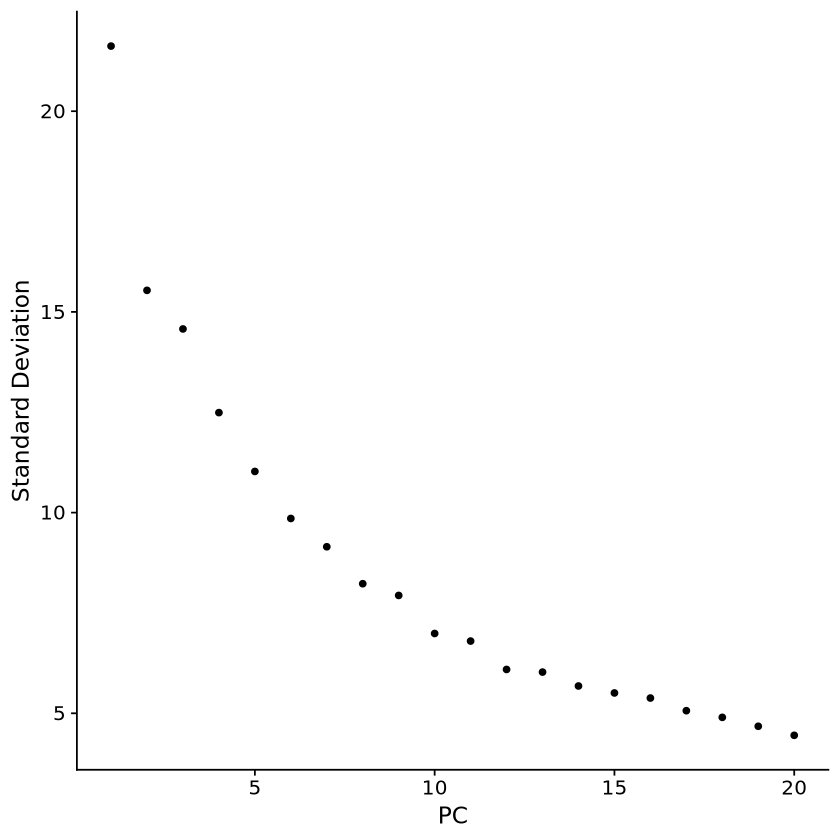

In [4]:
rnamat %>% column_to_rownames("gene") %>% as.matrix() %>% CreateSeuratObject() -> charm
charm[[]] %>% mutate(cellname = rownames(.)) %>% left_join(metadata) %>% mutate(temp = cellname) %>% column_to_rownames("temp") -> charm@meta.data

charm %>% SCTransform(verbose = FALSE,variable.features.n=5000) %>% RunPCA(verbose=FALSE) -> charm
ElbowPlot(charm)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'



Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'



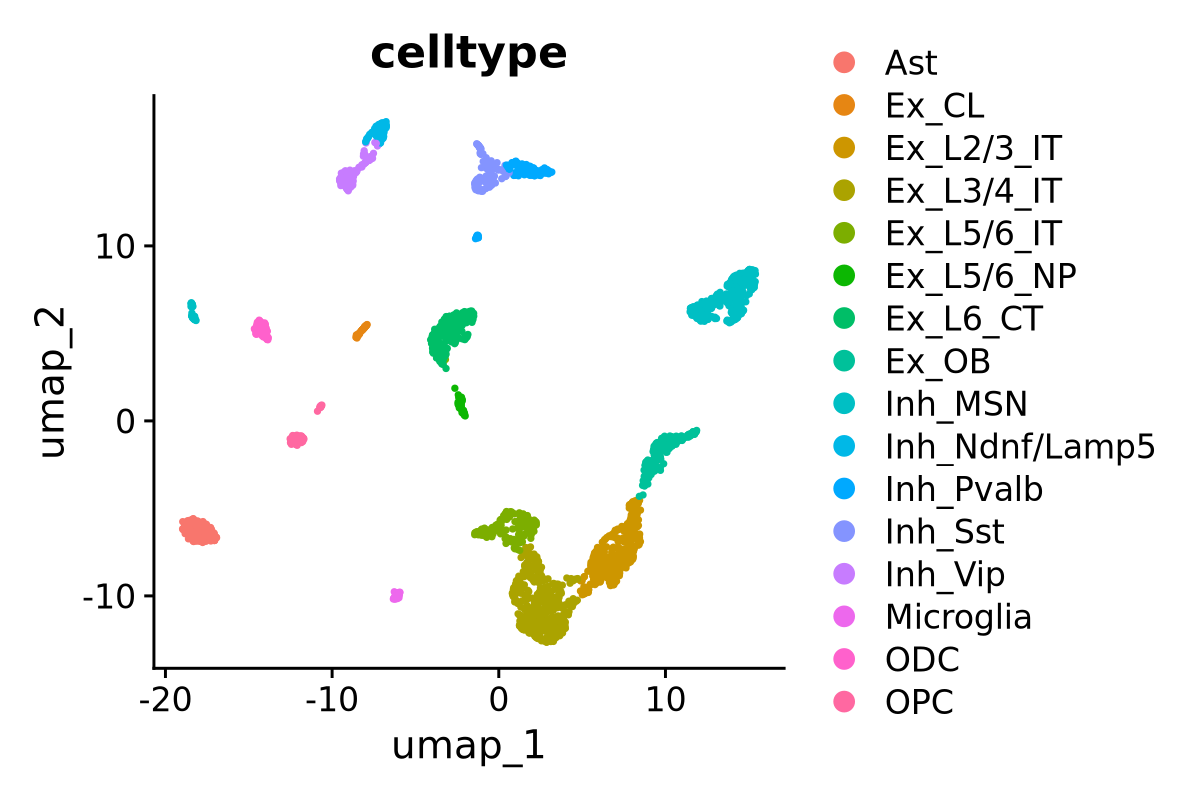

In [5]:
charm %>% RunUMAP(dims = 1:20,verbose = FALSE) -> charm
options(repr.plot.width=6, repr.plot.height=4,repr.plot.res=200)
DimPlot(charm,group.by="celltype",reduction="umap") 

In [6]:
variable_genes = VariableFeatures(charm)

In [7]:
variable_genes %>% as.data.frame() %>% write_tsv("brain.top5k.variablegenes.tsv",col_names = FALSE)

In [8]:
charm[["RNA"]]$counts %>% as.matrix() %>% as.data.frame() %>% rownames_to_column("gene") %>% write_tsv("brain.rna.tsv.gz")

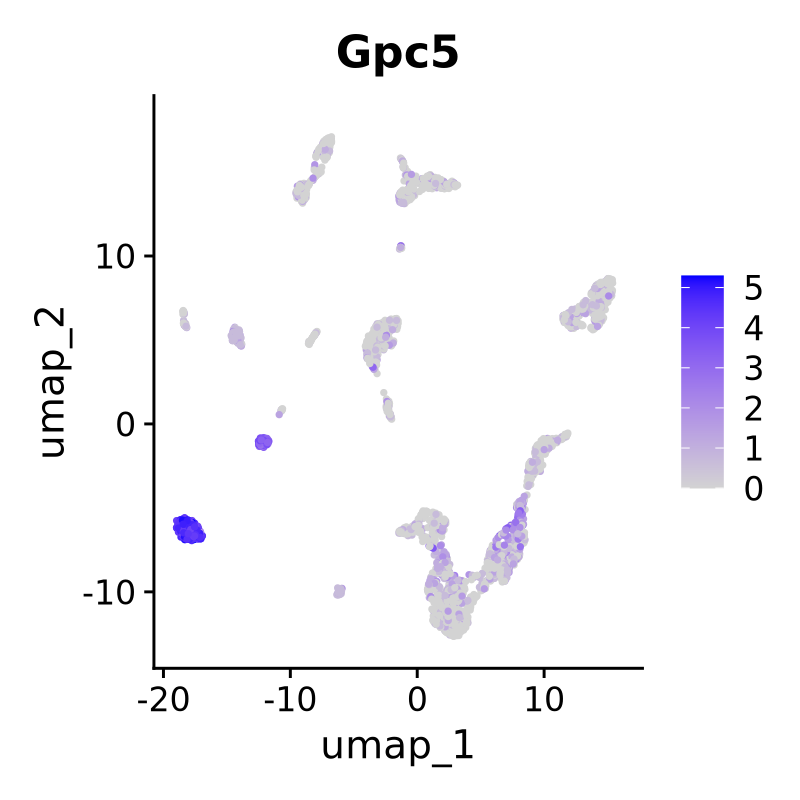

In [9]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=200)
FeaturePlot(charm,features=variable_genes[1])

In [10]:
charm[[]] %>% select(cellname, celltype) %>% write_tsv("brain.metadata.tsv",col_names = FALSE)

In [11]:
charm %>% FindNeighbors(dims = 1:20) %>% FindClusters(resolution = 15) -> charm
charm %>% FindNeighbors(dims = 1:20) %>% FindClusters(resolution = 20) -> charm
charm %>% FindNeighbors(dims = 1:20) %>% FindClusters(resolution = 25) -> charm


Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2736
Number of edges: 77381

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5270
Number of communities: 75
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2736
Number of edges: 77381

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4513
Number of communities: 81
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2736
Number of edges: 77381

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3823
Number of communities: 95
Elapsed time: 0 seconds


1 singletons identified. 94 final clusters.



In [12]:
charm[[]] %>% select(cellname,celltype,SCT_snn_res.15,SCT_snn_res.20,SCT_snn_res.25)%>% write_tsv("brain.metadata.tsv",col_names = FALSE)

In [13]:
charm[["SCT"]]$data %>% as.matrix() %>% t() %>% as.data.frame() %>% rownames_to_column("cellname") %>% 
    left_join(charm[[]] %>% select(cellname, SCT_snn_res.15)) %>% select(-cellname) %>% group_by(SCT_snn_res.15) %>% 
    summarise_all(mean) -> mc_rna_mat
mc_rna_mat %>% write_tsv("SCT_metacellmean.tsv.gz")

Joining with `by = join_by(cellname)`


In [14]:
Idents(charm) <- "celltype"
markers = FindMarkers(charm,ident.1 = c("Ex_L2/3_IT","Ex_L3/4_IT","Ex_L5/6_IT","Ex_L5/6_NP","Ex_L6_CT","Ex_CL"),
                  ident.2 = c("Inh_Pvalb","Inh_Sst","Inh_MSN","Inh_Vip","Inh_Ndnf/Lamp5"))

In [15]:
markers %>% rownames_to_column("gene") %>% write_tsv("brain.markers.tsv.gz")

In [19]:
#allmarkers = FindAllMarkers(charm,only.pos = TRUE)

allmarkers %>% write_tsv("brain.allmarkers.tsv.gz")